In [230]:
import pandas as pd
import numpy as np

In [175]:
df = pd.read_csv("C:\\Users\\ssais\\Downloads\\mental_health_finaldata_1.csv")
df

,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness
0,20-25,Female,Corporate,1-14 days,Yes,Yes,No,Yes,Yes,Medium,No,No,Yes
1,30-Above,Male,Others,31-60 days,Yes,Yes,Maybe,No,No,High,No,No,Yes
2,30-Above,Female,Student,Go out Every day,No,No,Yes,No,No,Medium,Yes,Maybe,No
3,25-30,Male,Others,1-14 days,Yes,No,Maybe,No,Maybe,Medium,No,Maybe,Yes
4,16-20,Female,Student,More than 2 months,Yes,Yes,Yes,No,Yes,Medium,Yes,Maybe,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,20-25,Male,Corporate,Go out Every day,No,Yes,No,Yes,Yes,Medium,No,Yes,Maybe
820,20-25,Male,Others,1-14 days,Yes,Yes,No,Yes,Maybe,Low,No,Maybe,Maybe
821,20-25,Male,Student,More than 2 months,Yes,Maybe,Maybe,No,Yes,High,Yes,Yes,Maybe
822,16-20,Male,Business,15-30 days,No,No,Maybe,No,Maybe,Low,Yes,No,Maybe


In [180]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [214]:
df_encoded = df.copy()


In [215]:
for cols in df_encoded.columns:
    if df_encoded[cols].dtype == 'object':
        df_encoded[cols] = le.fit_transform(df[cols])
df_encoded

,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness
0,1,0,1,0,2,2,1,2,2,2,0,1,2
1,3,1,3,2,2,2,0,1,1,0,0,1,2
2,3,0,4,3,1,1,2,1,1,2,1,0,1
3,2,1,3,0,2,1,0,1,0,2,0,0,2
4,0,0,4,4,2,2,2,1,2,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,1,1,1,3,1,2,1,2,2,2,0,2,0
820,1,1,3,0,2,2,1,2,0,1,0,0,0
821,1,1,4,4,2,0,0,1,2,0,1,2,0
822,0,1,0,1,1,1,0,1,0,1,1,1,0


In [271]:
mood_mapping = {'Low':1,'Medium':2,'High':3}
# df_encoded['Mood_Swings_Encoded'] = df_encoded['Mood_Swings'].map(mood_mapping)
df_interaction = pd.concat([df_encoded,age_dummies],axis=1)
for age_category in age_dummies.columns:
    name = f'{age_category}_x_Mood_swings'
    df_interaction[name] = df_interaction[age_category]*df_interaction['Mood_Swings']

In [272]:
#Creating a new feature:
gender_dummies = pd.get_dummies(df2['Gender'],prefix='Gender',drop_first=True)

gender_dummies = gender_dummies.apply(lambda x:x.apply(lambda y: 1 if y else 0))
gender_dummies['Gender_1'].dtype
df_interaction['Gender_x_work'] = df_interaction['Gender']*gender_dummies['Gender_1']

In [278]:
quaratine_dummies = pd.get_dummies(df2['Quarantine_Frustrations'],prefix='Q',drop_first=True)
quaratine_dummies = quaratine_dummies.apply(lambda x: x.apply(lambda y: 1 if y else 0))
quaratine_dummies

,Q_1,Q_2
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
819,0,1
820,0,1
821,0,0
822,1,0


In [279]:
df_interaction['Gender_x_work_x_quarantine1'] = df_interaction['Gender_x_work']*quaratine_dummies['Q_1']
df_interaction['Gender_x_work_x_quarantine2'] = df_interaction['Gender_x_work']*quaratine_dummies['Q_2']

In [280]:
df_interaction

,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,...,Social_Weakness,Age_1,Age_2,Age_3,Age_1_x_Mood_swings,Age_2_x_Mood_swings,Age_3_x_Mood_swings,Gender_x_work,Gender_x_work_x_quarantine1,Gender_x_work_x_quarantine2
0,1,0,1,0,2,2,1,2,2,2,...,2,1,0,0,2,0,0,0,0,0
1,3,1,3,2,2,2,0,1,1,0,...,2,0,0,1,0,0,0,1,0,1
2,3,0,4,3,1,1,2,1,1,2,...,1,0,0,1,0,0,2,0,0,0
3,2,1,3,0,2,1,0,1,0,2,...,2,0,1,0,0,2,0,1,1,0
4,0,0,4,4,2,2,2,1,2,2,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,1,1,1,3,1,2,1,2,2,2,...,0,1,0,0,2,0,0,1,0,1
820,1,1,3,0,2,2,1,2,0,1,...,0,1,0,0,1,0,0,1,0,1
821,1,1,4,4,2,0,0,1,2,0,...,0,1,0,0,0,0,0,1,0,0
822,0,1,0,1,1,1,0,1,0,1,...,0,0,0,0,0,0,0,1,1,0


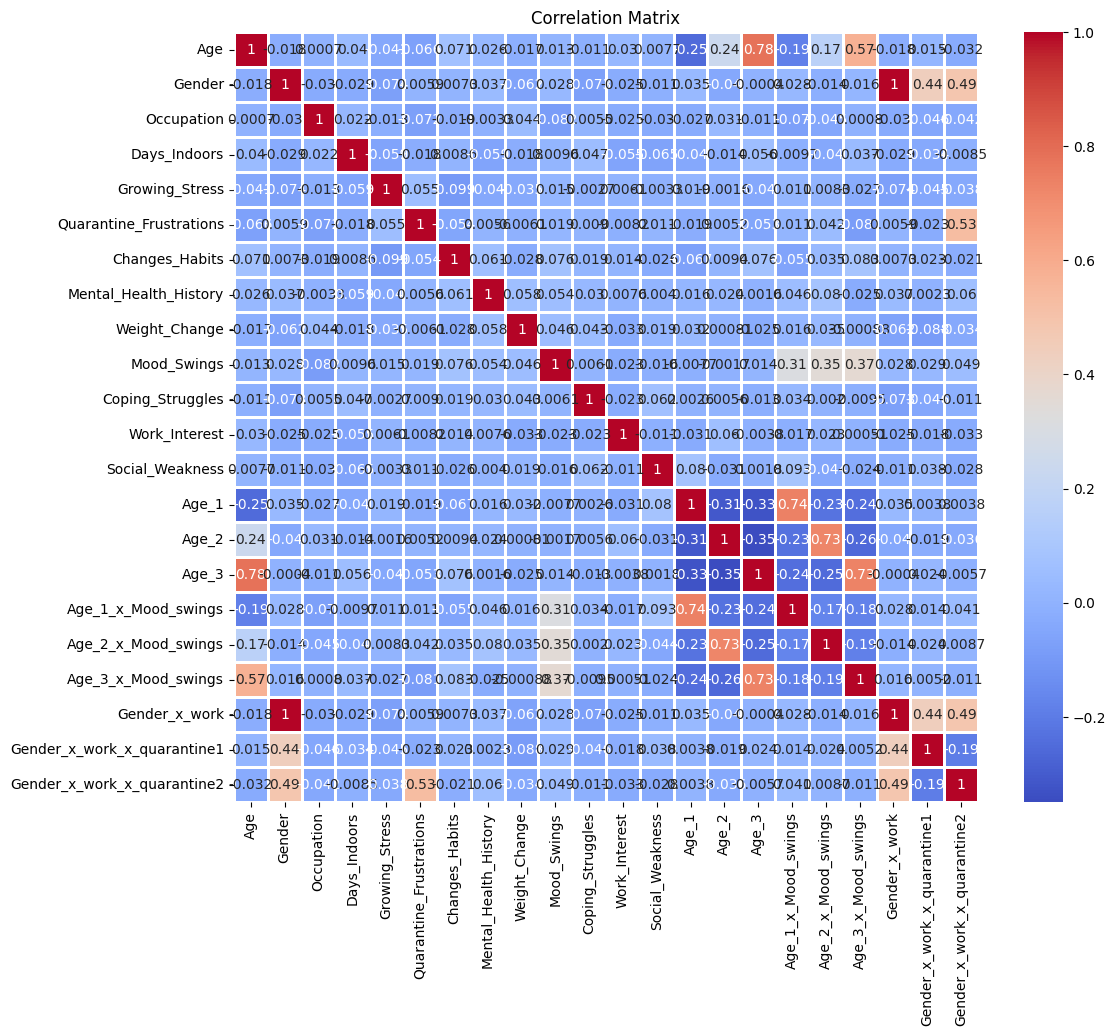

In [281]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,10))
correlation_matrix = df_interaction.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',linewidths=2)
plt.title('Correlation Matrix')
plt.show()



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



Text(0.5, 0, 'Age')

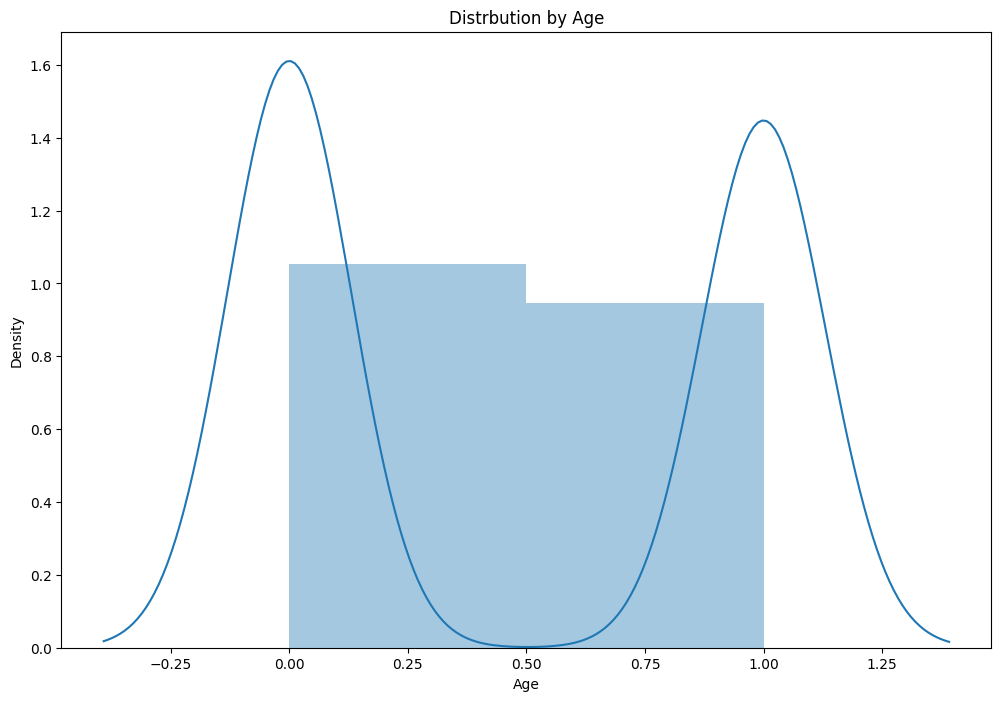

In [188]:
plt.figure(figsize=(12,8))
sns.distplot(df_encoded['Gender'],bins=2)
plt.title("Distrbution by Age")
plt.xlabel("Age")

In [178]:
df.describe()

,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness
count,824,824,824,824,824,824,824,824,824,824,824,824,824
unique,4,2,5,5,3,3,3,3,3,3,2,3,3
top,30-Above,Female,Housewife,31-60 days,Yes,Yes,Yes,No,Maybe,Medium,No,No,Maybe
freq,222,434,185,171,301,304,305,284,281,280,414,295,287


In [149]:
df2 = pd.read_csv("C:\\Users\\ssais\\Downloads\\mental_health_finaldata_1.csv")

In [108]:
len(df)

824

In [109]:
see = []
for column in df.columns:
    see.append(df[column].value_counts())


In [110]:
see

[Age
 30-Above    222
 16-20       211
 25-30       205
 20-25       186
 Name: count, dtype: int64,
 Gender
 Female    434
 Male      390
 Name: count, dtype: int64,
 Occupation
 Housewife    185
 Student      180
 Corporate    159
 Others       155
 Business     145
 Name: count, dtype: int64,
 Days_Indoors
 31-60 days            171
 1-14 days             170
 Go out Every day      168
 More than 2 months    160
 15-30 days            155
 Name: count, dtype: int64,
 Growing_Stress
 Yes      301
 Maybe    267
 No       256
 Name: count, dtype: int64,
 Quarantine_Frustrations
 Yes      304
 Maybe    266
 No       254
 Name: count, dtype: int64,
 Changes_Habits
 Yes      305
 Maybe    268
 No       251
 Name: count, dtype: int64,
 Mental_Health_History
 No       284
 Maybe    282
 Yes      258
 Name: count, dtype: int64,
 Weight_Change
 Maybe    281
 No       275
 Yes      268
 Name: count, dtype: int64,
 Mood_Swings
 Medium    280
 Low       278
 High      266
 Name: count, dtype: in

In [111]:
items = {}
for cols in df.columns:
    ite = cols
    items[cols] = df[ite].unique()
    

# items

In [112]:
items

{'Age': array(['20-25', '30-Above', '25-30', '16-20'], dtype=object),
 'Gender': array(['Female', 'Male'], dtype=object),
 'Occupation': array(['Corporate', 'Others', 'Student', 'Housewife', 'Business'],
       dtype=object),
 'Days_Indoors': array(['1-14 days', '31-60 days', 'Go out Every day',
        'More than 2 months', '15-30 days'], dtype=object),
 'Growing_Stress': array(['Yes', 'No', 'Maybe'], dtype=object),
 'Quarantine_Frustrations': array(['Yes', 'No', 'Maybe'], dtype=object),
 'Changes_Habits': array(['No', 'Maybe', 'Yes'], dtype=object),
 'Mental_Health_History': array(['Yes', 'No', 'Maybe'], dtype=object),
 'Weight_Change': array(['Yes', 'No', 'Maybe'], dtype=object),
 'Mood_Swings': array(['Medium', 'High', 'Low'], dtype=object),
 'Coping_Struggles': array(['No', 'Yes'], dtype=object),
 'Work_Interest': array(['No', 'Maybe', 'Yes'], dtype=object),
 'Social_Weakness': array(['Yes', 'No', 'Maybe'], dtype=object)}

In [115]:
for cols in df.columns:
    if df[cols].dtype == 'object':
        df[cols] = le.fit_transform(df[cols])
df
    

,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness
0,1,0,1,0,2,2,1,2,2,2,0,1,2
1,3,1,3,2,2,2,0,1,1,0,0,1,2
2,3,0,4,3,1,1,2,1,1,2,1,0,1
3,2,1,3,0,2,1,0,1,0,2,0,0,2
4,0,0,4,4,2,2,2,1,2,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,1,1,1,3,1,2,1,2,2,2,0,2,0
820,1,1,3,0,2,2,1,2,0,1,0,0,0
821,1,1,4,4,2,0,0,1,2,0,1,2,0
822,0,1,0,1,1,1,0,1,0,1,1,1,0


In [117]:
items1 = {}
for cols in df.columns:
    items1[cols] = df[cols].unique()

items1
    

{'Age': array([1, 3, 2, 0]),
 'Gender': array([0, 1]),
 'Occupation': array([1, 3, 4, 2, 0]),
 'Days_Indoors': array([0, 2, 3, 4, 1]),
 'Growing_Stress': array([2, 1, 0]),
 'Quarantine_Frustrations': array([2, 1, 0]),
 'Changes_Habits': array([1, 0, 2]),
 'Mental_Health_History': array([2, 1, 0]),
 'Weight_Change': array([2, 1, 0]),
 'Mood_Swings': array([2, 0, 1]),
 'Coping_Struggles': array([0, 1]),
 'Work_Interest': array([1, 0, 2]),
 'Social_Weakness': array([2, 1, 0])}

In [118]:
decoded = {}
for cols in df.columns:
    decoded[cols] = le.inverse_transform(df[cols].unique())


decoded

ValueError: y contains previously unseen labels: [3]

In [ ]:
decodec = le.inverse_transform(df.Age)

ValueError: y contains previously unseen labels: [3]

In [ ]:
decodec = le.inverse_transform(df.Age.replace(le.classes_, 'unknown'))


ValueError: y contains previously unseen labels: [3]

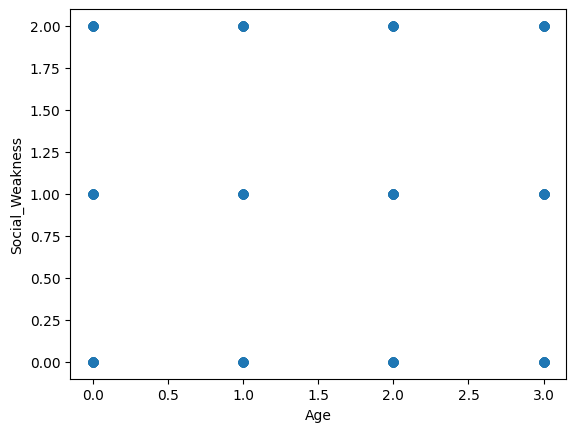

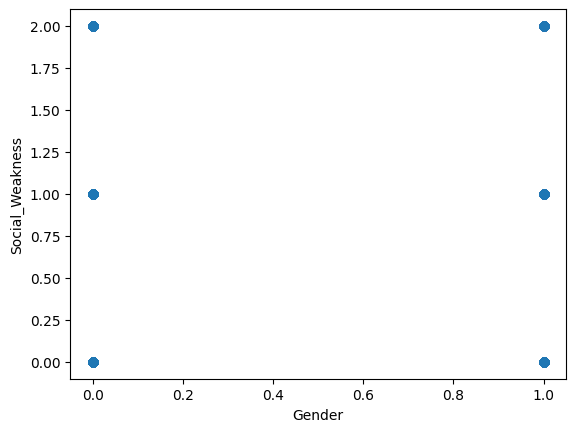

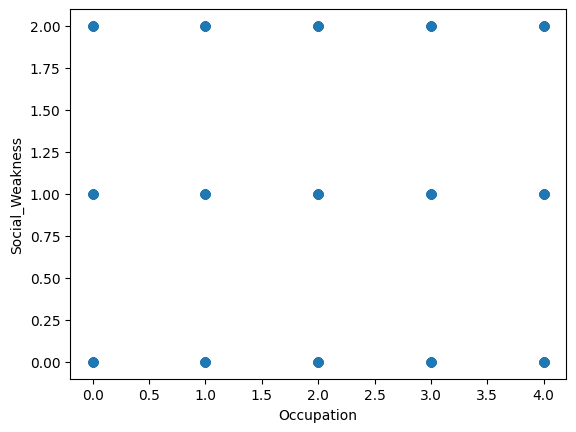

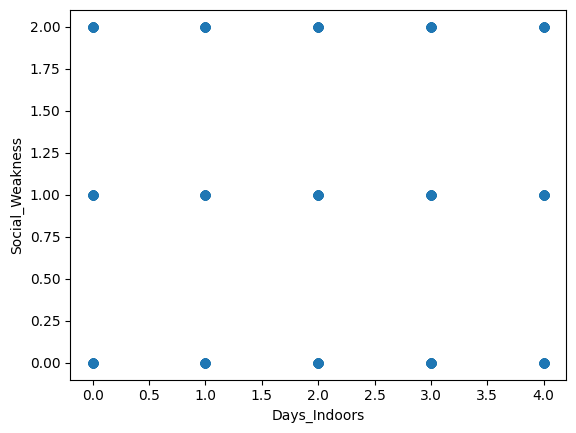

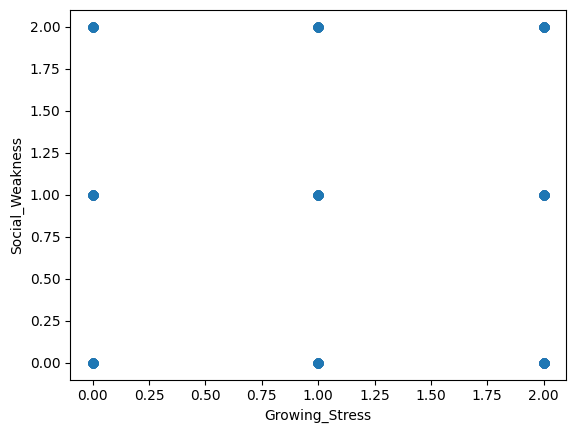

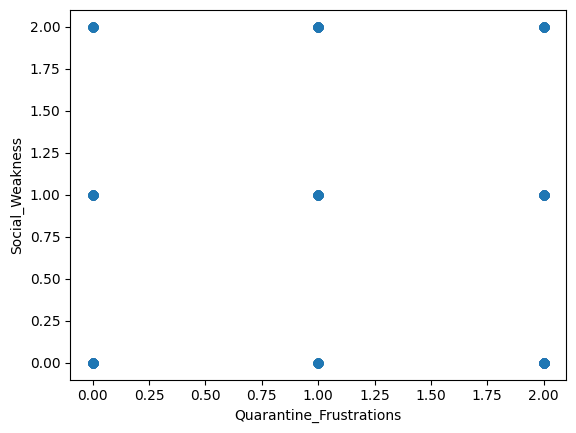

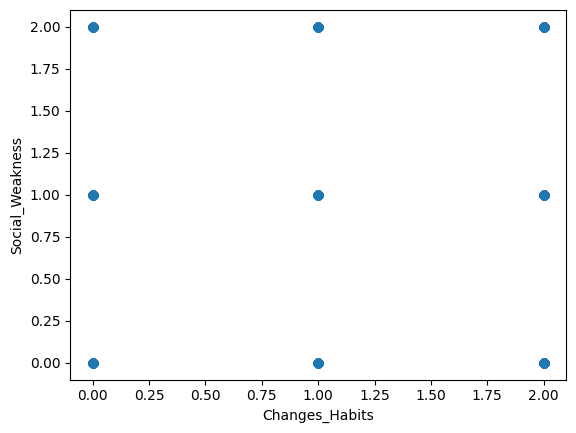

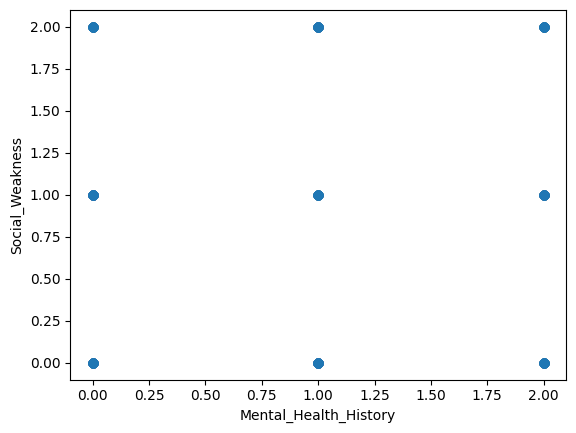

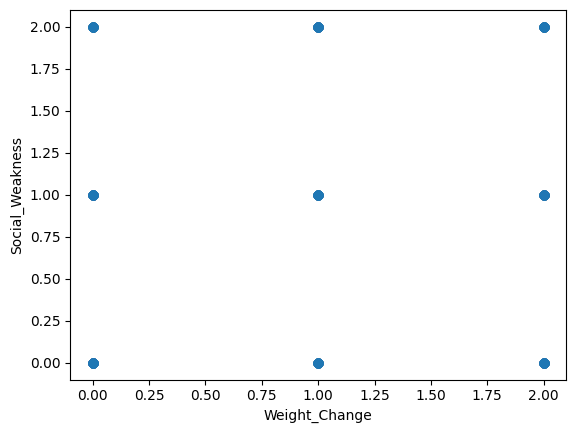

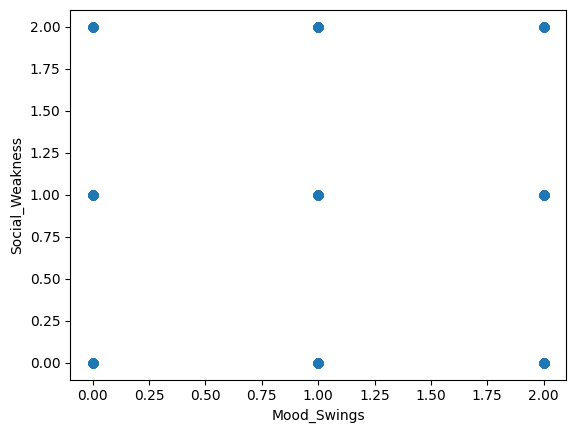

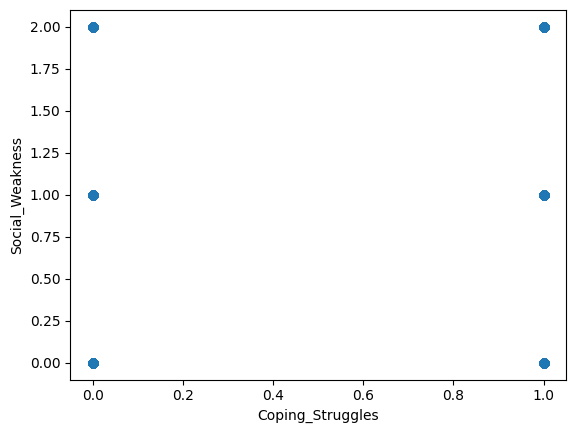

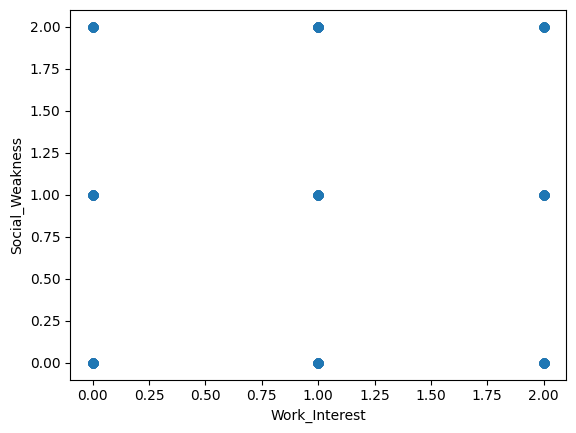

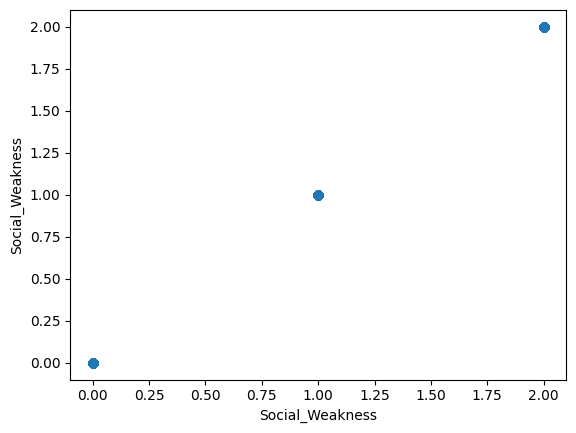

In [ ]:
import matplotlib.pyplot as plt
for col in df.columns:
    plt.scatter(df[col],df['Social_Weakness'])
    plt.xlabel(col)
    plt.ylabel('Social_Weakness')
    plt.show()

In [ ]:
X = []
y = []
for cols in df.columns:
    if cols != 'Social_Weakness':
        X.append(cols)
    else:
        y.append(cols)
X,y

(['Age',
  'Gender',
  'Occupation',
  'Days_Indoors',
  'Growing_Stress',
  'Quarantine_Frustrations',
  'Changes_Habits',
  'Mental_Health_History',
  'Weight_Change',
  'Mood_Swings',
  'Coping_Struggles',
  'Work_Interest'],
 ['Social_Weakness'])

ValueError: x and y must be the same size

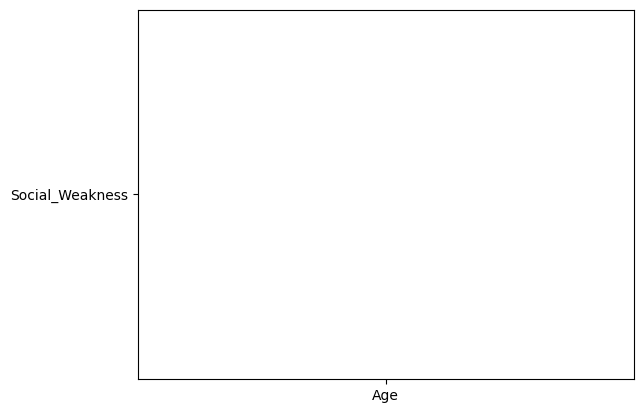

In [ ]:
plt.scatter(X,y)

In [ ]:
from sklearn.model_selection import train_test_split
Xi = df[X]
yi = df['Social_Weakness']
X_train,X_test,y_train,y_test = train_test_split(Xi,yi, test_size=0.3)

In [ ]:
from sklearn.linear_model import LogisticRegression
# logreg = LogisticRegression()
# logreg.fit(X_train,y_train)

In [ ]:
logreg.score(X_train,y_train)

NameError: name 'logreg' is not defined

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_params = {
    'svc': {
        'model': SVC(gamma='auto'),
        'params': {
            'C': [1, 10, 20],
            'kernel': ['rbf', 'linear']
        }
    },
    'rf': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [1, 5, 10]
        }
    },
    'lr': {
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'C': [1, 5, 10]
        }
    },
    'knn': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': list(range(1, 40)),
            'leaf_size': list(range(1, 50)),
            'p': [1, 2]
        }
    },
    'mnb': {
        'model': MultinomialNB(),
        'params': {
            'alpha': [0, 1, 2, 3],
            'fit_prior': [True, False]
        }
    },
    'dt': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy'],
            'splitter': ['best', 'random'],
            'max_depth': list(range(1,101))
        }
    }
    # 'voting': {
    #     'model': VotingClassifier(estimators=[
    #         ('svc', SVC(gamma='auto')),
    #         ('rf', RandomForestClassifier()),
    #         ('lr', LogisticRegression(solver='liblinear', multi_class='auto')),
    #         ('knn', KNeighborsClassifier()),
    #         ('mnb', MultinomialNB()),
    #         ('dt', DecisionTreeClassifier())
    #     ]),
    #     'params': {
    #         'model__voting': ['hard', 'soft']
    #     }
    # }
}

In [ ]:
param_grids = [{f'{model_name}__{param_name}': param_list for param_name,param_list in model['params'].items()} for model_name,model in model_params.items()]

In [ ]:
param_grids

[{'svc__C': [1, 10, 20], 'svc__kernel': ['rbf', 'linear']},
 {'rf__n_estimators': [1, 5, 10]},
 {'lr__C': [1, 5, 10]},
 {'knn__n_neighbors': [1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39],
  'knn__leaf_size': [1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   48,
   49],
  'knn__p': [1, 2]},
 {'mnb__alpha': [0, 1, 2, 3], 'mnb__fit_prior': [True, False]},
 {'dt__criterion': ['gini', 'entropy'],
  'dt__splitter': ['best', 'random'],
  'dt__max_depth': [0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
voting_clf = VotingClassifier(estimators = [('svc',SVC()),('rf',RandomForestClassifier()),('lr',LogisticRegression()),('knn',KNeighborsClassifier()),('mnb',MultinomialNB()),('dt',DecisionTreeClassifier())])

In [ ]:
pipeline = Pipeline([
('model','passthrough')
]) 
pipeline

Pipeline(steps=[('model', 'passthrough')])

In [ ]:
from sklearn.model_selection import GridSearchCV
scores = []
for i in range(2,11):
    for model_name, mp in model_params.items():
        clf = GridSearchCV(mp['model'],mp['params'],cv=i,return_train_score = False)
        clf.fit(X_train,y_train)
        scores.append({
            'Number of splits': i,
            'model':model_name,
            'best_score':clf.best_score_,
            'best_params':clf.best_params_
        })


c:\Users\ssais\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\naive_bayes.py:624: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
c:\Users\ssais\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\naive_bayes.py:633: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
c:\Users\ssais\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\naive_bayes.py:624: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
c:\Users\ssais\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\naive_bayes.py:633: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
c:\Use

KeyboardInterrupt: 

In [ ]:
scr = pd.DataFrame(scores)
scr


,model,best_score,best_params
0,svc,0.338501,"{'C': 1, 'kernel': 'rbf'}"
1,rf,0.349090,{'n_estimators': 1}
2,lr,0.307692,{'C': 5}
3,knn,0.368089,"{'leaf_size': 1, 'n_neighbors': 24, 'p': 1}"
4,mnb,0.331871,"{'alpha': 2, 'fit_prior': False}"
5,dt,0.380063,"{'criterion': 'gini', 'max_depth': 94, 'splitt..."


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
kf = KFold(n_splits=10,random_state=42,shuffle=True)
for train_index,val_index in kf.split(Xi):
    X_train,X_val = Xi.iloc[train_index],Xi.iloc[val_index],
    y_train,y_val = yi.iloc[train_index],yi.iloc[val_index]
print('X_train',train_index)
print('X_val',val_index)

gb = GradientBoostingClassifier(learning_rate=0.1)
gb.get_params()

X_train [  0   2   3   4   5   6   7   8   9  10  11  12  14  15  16  17  18  19
  22  23  24  25  26  27  28  29  30  31  32  33  35  36  37  38  39  40
  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  59
  60  61  62  63  64  65  66  67  68  69  70  72  73  74  75  76  77  78
  79  81  82  83  84  85  86  88  89  90  92  93  94  95  96  97  98 100
 101 103 104 107 108 109 110 111 112 113 114 115 116 117 118 119 120 122
 123 124 125 126 127 128 129 131 132 133 134 135 136 137 138 139 140 141
 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159
 162 163 164 165 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 190 192 193 194 195 196 197 198 199 200
 202 203 204 206 207 208 209 210 211 212 213 215 216 217 218 219 220 221
 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239
 240 242 244 245 246 247 248 249 250 251 253 254 255 256 257 258 259 260
 261 262 263 264 265 266 267 268 269 271 27

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
gb.fit(X_train,y_train)
from sklearn.metrics import classification_report
print(classification_report(y_val,gb.predict(X_val)))

              precision    recall  f1-score   support

           0       0.44      0.52      0.47        27
           1       0.39      0.34      0.37        32
           2       0.41      0.39      0.40        23

    accuracy                           0.41        82
   macro avg       0.41      0.42      0.41        82
weighted avg       0.41      0.41      0.41        82



In [ ]:
fg = pd.DataFrame(classification_reporbt(y_val,gb.predict(X_val),zero_division=0.0))
fg

ValueError: DataFrame constructor not properly called!

In [ ]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(Xi,yi,test_size=0.2,random_state=42)

In [ ]:
gb.score(X_test,y_test)

0.6854838709677419

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
svc = SVC(probability=True,kernel='linear')
knn = KNeighborsClassifier(n_neighbors=7,algorithm = 'ball_tree')
abc = AdaBoostClassifier(n_estimators=6,learning_rate=0.3,random_state=0)
abc.fit(X_train,y_train)
print(classification_report(y_val,abc.predict(X_val)))
print("Accuracy",accuracy_score(y_test,abc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.36      0.70      0.48        27
           1       0.52      0.44      0.47        32
           2       0.50      0.04      0.08        23

    accuracy                           0.41        82
   macro avg       0.46      0.39      0.34        82
weighted avg       0.46      0.41      0.36        82

Accuracy 0.39919354838709675


In [ ]:
gb.score(X_test,y_test)

0.6693548387096774

In [ ]:
print("Accuracy",accuracy_score(y_test,gb.predict(X_test)))

Accuracy 0.6693548387096774


In [ ]:
!pip install xgboost

   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 163.8 kB/s eta 0:10:09
   ---------------------------------------- 0.0/99.8 MB 163.8 kB/s eta 0:10:09
   ---------------------------------------- 0.0/99.8 MB 164.3 kB/s eta 0:10:07
   ---------------------------------------- 0.1/99.8 MB 218.8 kB/s eta 0:07:36
   ---------------------------------------- 0.1/99.8 MB 218.8 kB/s eta 0:07:36
   ---------------------------------------- 0.1/99.8 MB 163.8 kB/s eta 0:10:09
   ---------------------------------------- 0.1/99.8 MB 210.1 kB/s eta 0:07:55
   ---------------------------------------- 0.2/99.8 MB 458.5 kB/s eta 0:03:38
   ---------------------------------------- 0.2/99.8 MB 458.5 kB/s eta 0:03:38
   ------

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import xgboost as xgb
learning_rate_range = np.arange(0.01,1,0.05)
test_XG = []
train_XG = []
for lr in learning_rate_range:
    xgb_classifier = xgb.XGBClassifier(eta = lr)
    xgb_classifier.fit(X_train,y_train)
    train_XG.append(xgb_classifier.score(X_train,y_train))
    test_XG.append(xgb_classifier.score(X_test,y_test))

In [ ]:
import xgboost as xgb
learning_rate_range = np.arange(3,10,1)
test_XG1 = []
train_XG1 = []
for lr in learning_rate_range:
    xgb_classifier1 = xgb.XGBClassifier(max_depth = lr,eta=0.86)
    xgb_classifier1.fit(X_train,y_train)
    train_XG1.append(xgb_classifier1.score(X_train,y_train))
    test_XG1.append(xgb_classifier1.score(X_test,y_test))

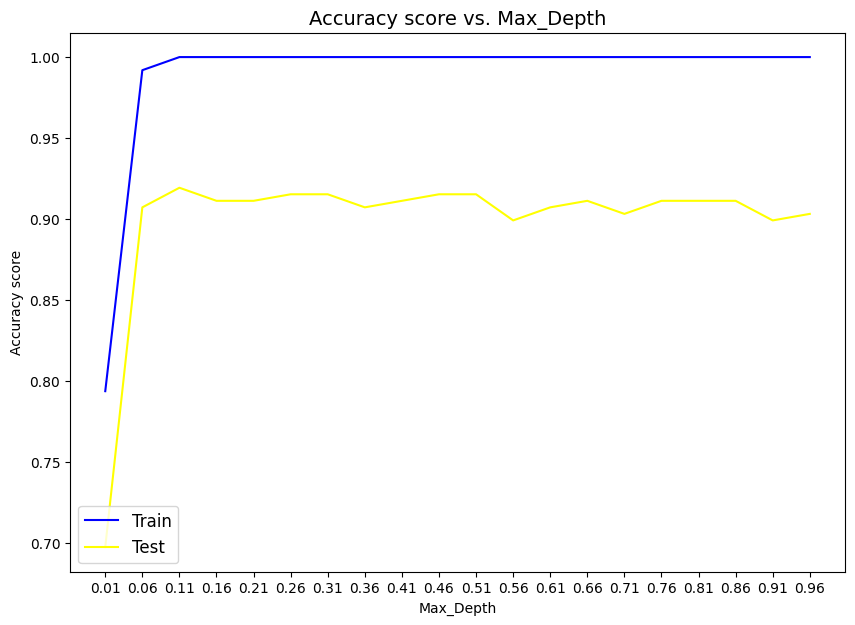

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(learning_rate_range,train_XG,c='blue',label='Train')
plt.plot(learning_rate_range,test_XG,c='yellow',label='Test')
plt.xlabel('Max_Depth')
plt.xticks(learning_rate_range)
plt.ylabel('Accuracy score')

plt.legend(prop={'size': 12}, loc=3)
plt.title('Accuracy score vs. Max_Depth', size=14)
plt.show()

In [ ]:
xgb_classifier.score(X_test,y_test)

0.9032258064516129

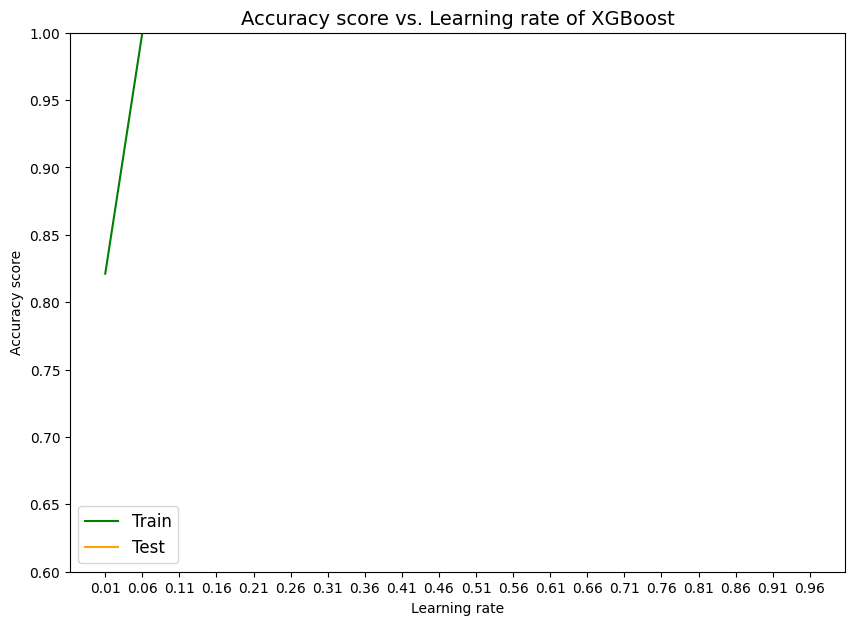

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(learning_rate_range,train_XG,c='green',label='Train')
plt.plot(learning_rate_range,test_XG,c='orange',label='Test')
plt.xlabel('Learning rate')
plt.xticks(learning_rate_range)
plt.ylabel('Accuracy score')
plt.ylim(0.6, 1)
plt.legend(prop={'size': 12}, loc=3)
plt.title('Accuracy score vs. Learning rate of XGBoost', size=14)
plt.show()

In [120]:
xb2 = xgb.XGBClassifier(eta= 0.08)
xb2.fit(X_train,y_train)
xb2.score(X_test,y_test)

0.9233870967741935

In [ ]:
xb3 = xgb.XGBClassifier(eta=0.06)

In [121]:
model = xgb.XGBClassifier(
    objective = 'multi:softmax',alpha = 0.001, reg_lambda  = 1,random_state = 42)

model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9153225806451613

In [122]:
alpha_range = np.arange(0.0001,1,0.001)
scores_train = []
scores_test = []
for i in alpha_range:
    model = xgb.XGBClassifier(
    objective = 'multi:softmax',alpha = i, reg_lambda  = 1,random_state = 42)

    model.fit(X_train,y_train)
    scores_train.append(model.score(X_train,y_train))
    scores_test.append(model.score(X_test,y_test))

KeyboardInterrupt: 

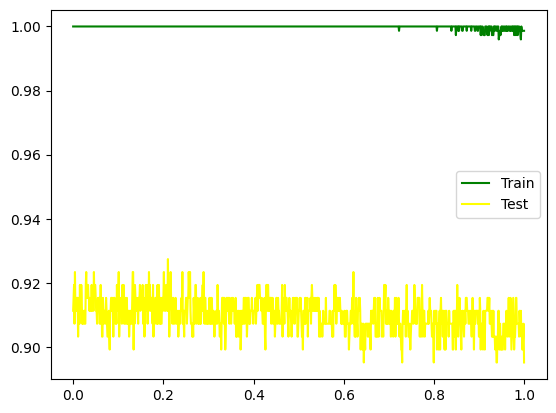

In [83]:
plt.plot(alpha_range,scores_train,c='green',label='Train')
plt.plot(alpha_range,scores_test,c='yellow',label='Test')
plt.legend()

In [93]:
reg_lambda_range = np.arange(0,10,0.1)
l_train = []
l_test = []
for i in reg_lambda_range:
    model = xgb.XGBClassifier(
    objective = 'multi:softmax',alpha = 0.25, reg_lambda  = i,random_state = 42)

    model.fit(X_train,y_train)
    l_train.append(model.score(X_train,y_train))
    l_test.append(model.score(X_test,y_test))

In [92]:
len(reg_lambda_range)

100

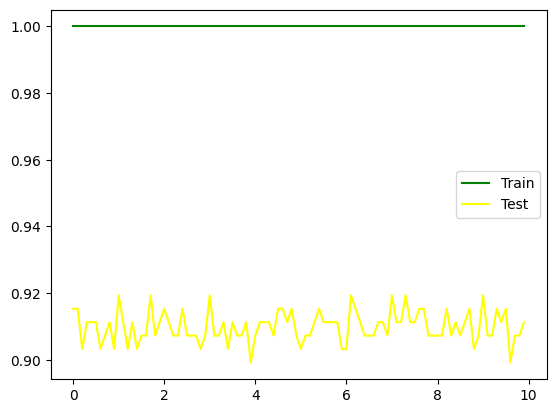

In [94]:
plt.plot(reg_lambda_range,l_train,c='green',label='Train')
plt.plot(reg_lambda_range,l_test,c='yellow',label='Test')
plt.legend()

In [123]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',annot_kws={"size":12})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

NotFittedError: need to call fit or load_model beforehand

In [98]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        73
           1       0.92      0.86      0.89        84
           2       0.90      0.96      0.93        91

    accuracy                           0.91       248
   macro avg       0.91      0.91      0.91       248
weighted avg       0.91      0.91      0.91       248



In [99]:
!pip install shap

   ---------------------------------------- 0.0/450.3 kB ? eta -:--:--
   -- ------------------------------------ 30.7/450.3 kB 435.7 kB/s eta 0:00:01
   ---------- ----------------------------- 112.6/450.3 kB 1.1 MB/s eta 0:00:01
   ------------------ --------------------- 204.8/450.3 kB 1.4 MB/s eta 0:00:01
   ----------------------------- ---------- 327.7/450.3 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------  440.3/450.3 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 450.3/450.3 kB 1.6 MB/s eta 0:00:00


In [100]:
import shap 
explainer = shap.TreeExplainer(model)
explanation = explainer(X_test)
shap_values = explanation.values
np.abs(shap_values.sum(axis=1) + explanation.base_values - y_pred).max()
shap.plots.beeswarm(explanation)

ValueError: operands could not be broadcast together with shapes (248,3) (248,) 

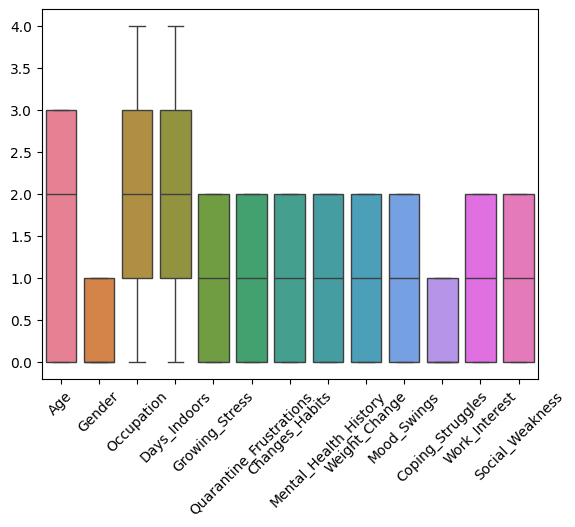

In [106]:
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

In [127]:
xb4 = xgb.XGBClassifier(eta=0.06,max_depth= 11)

In [128]:
xb4.fit(X_train,y_train)
xb4.score(X_test,y_test)

0.907258064516129

In [135]:
depth = np.arange(1,100,1)
score = []
values = []
for i in depth:
    xb5 = xgb.XGBClassifier(eta=0.06)
    xb5.fit(X_train,y_train)
    values.append(xb5.score(X_train,y_train))
    score.append(xb5.score(X_test,y_test))
    

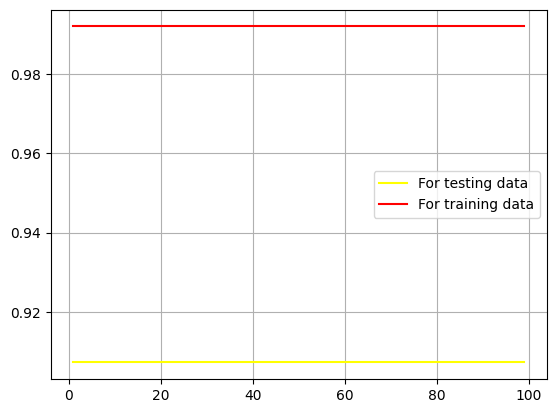

In [136]:
plt.plot(depth,score,c='yellow',label='For testing data')
plt.plot(depth,values,c='red',label='For training data')
plt.legend()
plt.grid()

In [137]:
score

[0.907258064516129,
 0.907258064516129,
 0.907258064516129,
 0.907258064516129,
 0.907258064516129,
 0.907258064516129,
 0.907258064516129,
 0.907258064516129,
 0.907258064516129,
 0.907258064516129,
 0.907258064516129,
 0.907258064516129,
 0.907258064516129,
 0.907258064516129,
 0.907258064516129,
 0.907258064516129,
 0.907258064516129,
 0.907258064516129,
 0.907258064516129,
 0.907258064516129,
 0.907258064516129,
 0.907258064516129,
 0.907258064516129,
 0.907258064516129,
 0.907258064516129,
 0.907258064516129,
 0.907258064516129,
 0.907258064516129,
 0.907258064516129,
 0.907258064516129,
 0.907258064516129,
 0.907258064516129,
 0.907258064516129,
 0.907258064516129,
 0.907258064516129,
 0.907258064516129,
 0.907258064516129,
 0.907258064516129,
 0.907258064516129,
 0.907258064516129,
 0.907258064516129,
 0.907258064516129,
 0.907258064516129,
 0.907258064516129,
 0.907258064516129,
 0.907258064516129,
 0.907258064516129,
 0.907258064516129,
 0.907258064516129,
 0.907258064516129,


In [138]:
from sklearn.model_selection import GridSearchCV
param_gridxb = {
    'learning_rate': np.arange(0.01,1,0.05),
    'n_estimators': np.arange(5,50,5),
    'max_depth':np.arange(5,50,5),
    'subsample': np.arange(0.01,0.99,0.01),
    'colsample_bytree':[0.8, 0.9, 1.0]
}


In [140]:
xgb_model = xgb.XGBClassifier()

# GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_gridxb, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_

KeyboardInterrupt: 

In [142]:
import tensorflow as tf

In [143]:
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [159]:
import pandas as pd
from sklearn.preprocessing import  OneHotEncoder

In [211]:
age_dummies = pd.get_dummies(df2['Age'],prefix='Age',drop_first=True)
age_dummies = age_dummies.apply(lambda x:x.apply(lambda y:1 if y else 0))
age_dummies

,Age_1,Age_2,Age_3
0,1,0,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,0,0
...,...,...,...
819,1,0,0
820,1,0,0
821,1,0,0
822,0,0,0


In [200]:
for cols in df2.columns:
    if df2[cols].dtype == 'object':
        df2[cols] = le.fit_transform(df2[cols])

df2

,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,Mood_Swings_Encoded
0,1,0,1,0,2,2,1,2,2,2,0,1,2,2
1,3,1,3,2,2,2,0,1,1,0,0,1,2,3
2,3,0,4,3,1,1,2,1,1,2,1,0,1,2
3,2,1,3,0,2,1,0,1,0,2,0,0,2,2
4,0,0,4,4,2,2,2,1,2,2,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,1,1,1,3,1,2,1,2,2,2,0,2,0,2
820,1,1,3,0,2,2,1,2,0,1,0,0,0,1
821,1,1,4,4,2,0,0,1,2,0,1,2,0,3
822,0,1,0,1,1,1,0,1,0,1,1,1,0,1


In [205]:
df_interaction

,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,Mood_Swings_Encoded,Age_20-25,Age_25-30,Age_30-Above,Age_20-25_x_Mood_swings,Age_25-30_x_Mood_swings,Age_30-Above_x_Mood_swings
0,1,0,1,0,2,2,1,2,2,2,0,1,2,NaN,1,0,0,NaN,NaN,NaN
1,3,1,3,2,2,2,0,1,1,0,0,1,2,NaN,0,0,1,NaN,NaN,NaN
2,3,0,4,3,1,1,2,1,1,2,1,0,1,NaN,0,0,1,NaN,NaN,NaN
3,2,1,3,0,2,1,0,1,0,2,0,0,2,NaN,0,1,0,NaN,NaN,NaN
4,0,0,4,4,2,2,2,1,2,2,1,0,1,NaN,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,1,1,1,3,1,2,1,2,2,2,0,2,0,NaN,1,0,0,NaN,NaN,NaN
820,1,1,3,0,2,2,1,2,0,1,0,0,0,NaN,1,0,0,NaN,NaN,NaN
821,1,1,4,4,2,0,0,1,2,0,1,2,0,NaN,1,0,0,NaN,NaN,NaN
822,0,1,0,1,1,1,0,1,0,1,1,1,0,NaN,0,0,0,NaN,NaN,NaN


Text(0, 0.5, 'Age')

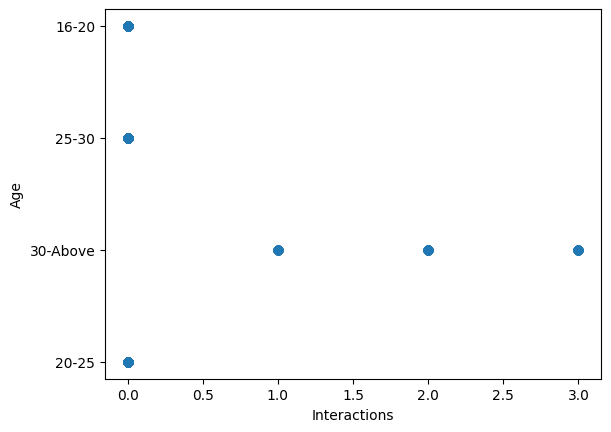

In [170]:
plt.scatter(df_interaction['Age_30-Above_x_Mood_swings'],df_interaction['Age'])
plt.xlabel('Interactions')
plt.ylabel('Age')

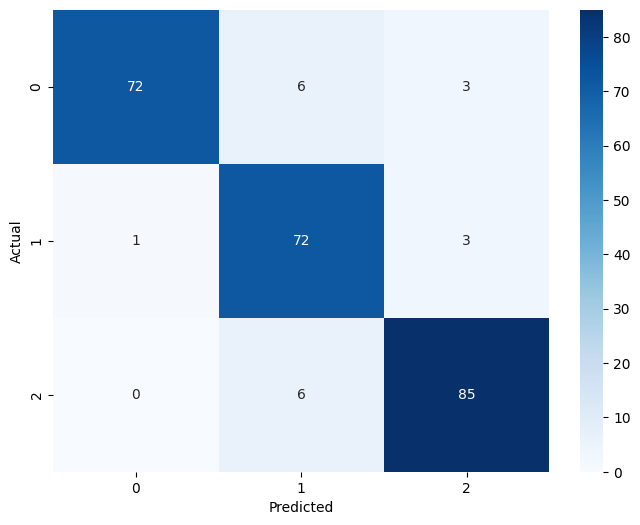

In [172]:
cm = confusion_matrix(xb2.predict(X_test),y_test)
labels = ['0','1','2']
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=labels,yticklabels=labels)
plt.xlabel('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [2]:
import pandas as pd

In [3]:
jk = pd.read_csv("C:\\Users\\ssais\\Documents\\Research under professors\\Sibarama-FacAd\\AQI_timest_updated.csv")

In [4]:
jk['Hour'].dtype

dtype('int64')